<a href="https://colab.research.google.com/github/freddiewinter/bootcamp/blob/main/GoodReads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GoodReads Best Books Ever

In this notebook we will analysis GoodReads data with a focus on difference rating metrics, awards, and language biases.

**Team members: Freddie Winter, Anna Masland**

"GoodReads Best Books" data source: [Kaggle](https://www.kaggle.com/datasets/thedevastator/comprehensive-overview-of-52478-goodreads-best-b)

Assignment Requirements:
2 Table Summaries, 4 Complete Charts, Include Text, Title, Subtitle, be easy to read. 

# Importing Data Set

In this section, we imported pandas, seaborn,numpy, matplotlib, and matplotlib.pyplot. We also mounted our google drives, and reading "Best_Books_Ever" CSV file.

In [ ]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read csv file -- 
goodreads = pd.read_csv('/content/drive/MyDrive/Python Bootcamp/books_1.Best_Books_Ever.csv')

# Review and Clean Data
In this section, we review the data set and clean the data of null values. This includes printing the information of the data, reviewing the minimum and maximum values, displays the first few rows, and removing null values.

In [ ]:
#review data
goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

In [ ]:
# displays the first seven rows of of the DataFrame
goodreads.head(7)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,09/01/05,['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.8
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,08/17/45,"['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['986764', '958699', '545475', '165093', '84682']",91.0,"['England', 'United Kingdom']",https://i.gr-assets.com/images/S/compressed.ph...,1276599,13264,4.42


In [ ]:
# returns the number of missing values in each column
goodreads.isna().sum()

bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

In [ ]:
# remove columns with poor data quality (large number of null values), label as new dataframe goodreads_remove_col
goodreads_remove_col = goodreads.drop(['edition', 'firstPublishDate', 'series', 'price'], axis=1)

# validate columns are removed, confirm remaining columns have low enough nulls to use dropna method 
goodreads_remove_col.isna().sum()

bookId               0
title                0
author               0
rating               0
description       1338
language          3806
isbn                 0
genres               0
characters           0
bookFormat        1473
pages             2347
publisher         3696
publishDate        880
awards               0
numRatings           0
ratingsByStars       0
likedPercent       622
setting              0
coverImg           605
bbeScore             0
bbeVotes             0
dtype: int64

In [ ]:
# remove null values and publish in new dataframe: goodreads_clean
goodreads_clean = goodreads_remove_col.dropna(subset=['description', 'language', 'bookFormat', 'pages', 'publisher', 'publishDate', 'likedPercent', 'coverImg'])

In [ ]:
# convert pages column to int64, some records include "1 page" value so first remove those, then convert datatype
goodreads_clean = goodreads_clean[~goodreads_clean['pages'].str.contains('1 page')]
goodreads_clean['pages'] = goodreads_clean['pages'].astype('int64')
goodreads_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43248 entries, 0 to 52477
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookId          43248 non-null  object 
 1   title           43248 non-null  object 
 2   author          43248 non-null  object 
 3   rating          43248 non-null  float64
 4   description     43248 non-null  object 
 5   language        43248 non-null  object 
 6   isbn            43248 non-null  object 
 7   genres          43248 non-null  object 
 8   characters      43248 non-null  object 
 9   bookFormat      43248 non-null  object 
 10  pages           43248 non-null  int64  
 11  publisher       43248 non-null  object 
 12  publishDate     43248 non-null  object 
 13  awards          43248 non-null  object 
 14  numRatings      43248 non-null  int64  
 15  ratingsByStars  43248 non-null  object 
 16  likedPercent    43248 non-null  float64
 17  setting         43248 non-null 

In [ ]:
# add column to dataset for count of awards

# create a new column for the count of awards
goodreads_clean['awards_count'] = goodreads_clean['awards'].str.count(',') + 1

# remove count of 1 for records where value is equal to []
goodreads_clean['awards_count'] = goodreads_clean['awards'].apply(lambda x: x.count(',') + 1 if ',' in x else 0 if x == '[]' else 1)

# show the updated DataFrame
goodreads_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43248 entries, 0 to 52477
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookId          43248 non-null  object 
 1   title           43248 non-null  object 
 2   author          43248 non-null  object 
 3   rating          43248 non-null  float64
 4   description     43248 non-null  object 
 5   language        43248 non-null  object 
 6   isbn            43248 non-null  object 
 7   genres          43248 non-null  object 
 8   characters      43248 non-null  object 
 9   bookFormat      43248 non-null  object 
 10  pages           43248 non-null  int64  
 11  publisher       43248 non-null  object 
 12  publishDate     43248 non-null  object 
 13  awards          43248 non-null  object 
 14  numRatings      43248 non-null  int64  
 15  ratingsByStars  43248 non-null  object 
 16  likedPercent    43248 non-null  float64
 17  setting         43248 non-null 

In [ ]:
43248 / 53448

0.8091603053435115

> *The dataset goodreads_clean is cleaned version of the original dataframe. Three columns were removed due to poor quality. Originally the dataset contained 52,448 records. After dropping null values from the set, we now have 43,248 records. This appraoch maintained 81% of records while ensuring that all columns contain values for analysis.*

# Top 10 Rated Books by Rating and BBE Score (Tables)
In this section, we analyze the difference of Ratings and BBE score. 

In [ ]:
# review max, median, and min number or ratings to determine threshold for ratings
goodreads_clean['numRatings'].agg([np.max, np.min, np.median])

amax      7048471.0
amin            1.0
median       3157.0
Name: numRatings, dtype: float64

In [ ]:
# find the mean of the number of ratings
goodreads_clean['numRatings'].mean()

21005.74054291528

In [ ]:
# filter data to only analyze books with more than 10,000 ratings
goodreads_10k_rating = goodreads_clean[goodreads_clean['numRatings'] > 10000]

# list top 10 books with more than 10,000 ratings 
top_rated_books_10k = goodreads_10k_rating.sort_values('rating', ascending=False).head(10)
top_rated_books_10ksubset = top_rated_books_10k[['title', 'rating', 'numRatings', 'bbeScore', 'bbeVotes']]
top_rated_books_10ksubset

,title,rating,numRatings,bbeScore,bbeVotes
256,The Complete Calvin and Hobbes,4.82,34893,50709,632
26500,"The Way of Kings, Part 2",4.79,13194,97,1
2756,ESV Study Bible,4.78,12868,1296,14
7008,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.78,52749,381,4
2699,Mark of the Lion Trilogy,4.77,11402,1331,16
5564,It's a Magical World,4.76,25874,517,6
635,Words of Radiance,4.75,207369,12481,133
14496,There's Treasure Everywhere,4.75,19726,174,2
3582,The Indispensable Calvin and Hobbes,4.74,19492,904,14
1565,The Authoritative Calvin and Hobbes: A Calvin ...,4.74,20857,2946,46


In [ ]:
# filter data to only analyze books with more than 1,000,000 ratings to see how rating threshold ifluences results
goodreads_1M_rating = goodreads_clean[goodreads_clean['numRatings'] > 1000000]

# list top 10 books with more than 1M ratings 
top_rated_books_1M = goodreads_1M_rating.sort_values('rating', ascending=False).head(10)
top_rated_books_1Msubset = top_rated_books_1M[['title', 'rating', 'numRatings', 'bbeScore', 'bbeVotes']]
top_rated_books_1Msubset

,title,rating,numRatings,bbeScore,bbeVotes
71,Harry Potter and the Deathly Hallows,4.62,2811637,351347,3835
105,Harry Potter and the Half-Blood Prince,4.57,2437658,162803,1889
93,Harry Potter and the Prisoner of Azkaban,4.57,2806471,247736,2770
103,Harry Potter and the Goblet of Fire,4.56,2594622,178933,2049
1,Harry Potter and the Order of the Phoenix,4.50,2507623,2632233,26923
30,The Help,4.47,2164011,718236,7693
32,Harry Potter and the Sorcerer's Stone,4.47,7048471,691430,7348
46,A Game of Thrones,4.45,2003043,562241,6007
126,Harry Potter and the Chamber of Secrets,4.43,2725847,130666,1567
44,A Thousand Splendid Suns,4.38,1151288,580722,6164


In [ ]:
# list of top 10 books by Best Books Ever Score (bbeScore)
top_rated_books_bbe = goodreads_clean.sort_values('bbeScore', ascending=False).head(10)
top_rated_books_subset_bbe = top_rated_books_bbe[['title', 'rating', 'numRatings', 'bbeScore', 'bbeVotes']]
top_rated_books_subset_bbe

,title,rating,numRatings,bbeScore,bbeVotes
0,The Hunger Games,4.33,6376780,2993816,30516
1,Harry Potter and the Order of the Phoenix,4.50,2507623,2632233,26923
2,To Kill a Mockingbird,4.28,4501075,2269402,23328
3,Pride and Prejudice,4.26,2998241,1983116,20452
4,Twilight,3.60,4964519,1459448,14874
5,The Book Thief,4.37,1834276,1372809,14168
6,Animal Farm,3.95,2740713,1276599,13264
7,The Chronicles of Narnia,4.26,517740,1238556,12949
8,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4.60,110146,1159802,12111
9,Gone with the Wind,4.30,1074620,1087732,11211


> *Finding: Comparing the lists, BBE Score (GoodReads Best Book Ever Score) is more reflective of titles that are known to be popular. A book's BBE score is based on multiple factors, including the number of people who have voted for it and how highly those voters ranked the book. Rating, by comparison, is the average rating of those that rated it (only including books with at least 10k ratings in this analysis). This analysis demonstrates the BBE score is helpful, but the unclear methodology that GoodReads applies to the score may inflate score for popular titles unfairly.*


# Correlation Analysis of Ratings & BBE Score with Award Count (Charts)
For this analysis, we used the dataset for books with 10k or more ratings in both cases for a fair comparison between ratings.

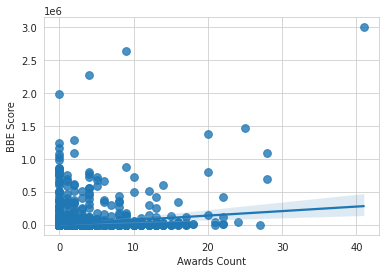

In [ ]:
# Comparison of BBE Score and Award Count in a scatter plot with linear regression
sns.regplot(x="awards_count", y="bbeScore", data=goodreads_10k_rating, scatter_kws={'s':60})

# Add labels to the axes
plt.xlabel("Awards Count")
plt.ylabel("BBE Score")

# Show the plot
plt.show()


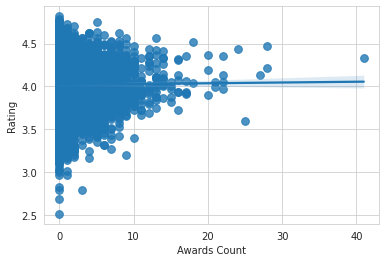

In [ ]:
# Comparison of Rating and Award Count in a scatter plot with linear regression
sns.regplot(x="awards_count", y="rating", data=goodreads_10k_rating, scatter_kws={'s':60})

# Add labels to the axes
plt.xlabel("Awards Count")
plt.ylabel("Rating")

# Show the plot
plt.show()

In [ ]:
# Calculate the correlation coefficients for both values
awards_bbe_corr = goodreads_clean['awards_count'].corr(goodreads_clean['bbeScore'])
awards_rating_corr = goodreads_10k_rating['awards_count'].corr(goodreads_10k_rating['rating'])

# Print the correlation coefficients
print("Correlation coefficient between awards count and BBE Score:", awards_bbe_corr)
print("Correlation coefficient between awards count and Rating:", awards_rating_corr)


Correlation coefficient between awards count and BBE Score: 0.1956534451708208
Correlation coefficient between awards count and Rating: 0.008038540954830116




> *Finding: There is no correlation between Rating and Award Count. There is a weak correlations bewteen BBE Score and Award Count. This suggests that BBE Score's methodology is more helpful in determining higher quality books if number of awards is an accepted factor for higher quality. From this analysis, we feel more confidence in using BBE Score over Rating to identify top books.*



# Validilty of Rating Systems by Liked Percentage and Ratings (Chart)

For this analysis, we compared the liked percentage with the ratings to determine the validity of the ratings data. The liked percentage is determined by the percent of ratings with over 2 stars and the ratings are out of five starts. 

If the liked percentage is accurate, then there should be a consistent scatter cluster upwards to show to correlation between the liked percentage and the rating that would match that percentage (ex. 3 out of 5 starts should show a large cluster near 60%).

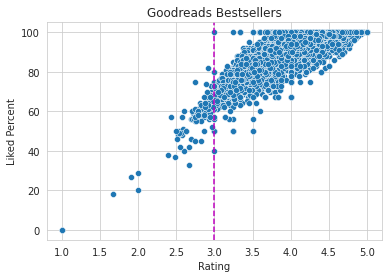

In [ ]:
# comparing liked percentage with the rating using a scatter plot
sns.scatterplot(x="rating", y="likedPercent", data=goodreads_clean);
plt.axvline(x=3, color='m', linestyle='--')
plt.title('Goodreads Bestsellers')
plt.xlabel('Rating')
plt.ylabel('Liked Percent')
plt.show()

*Finding: Based on our assumption above, the "liked" percentages are fairly accurate to the book's rating; however, they are not interchangeable. The scatter points are mostly clusters near ratings corresponding to "liked" percentages, and vice versa. However, there is some disparity observed in the 100% range, as there are some scatter points at a 3.5 rating but with a 100% "liked" percentage.*

# Bias Checking for Rated Books Written in English & in Other Langauges (Charts)
For this analysis, we wanted to check to and see how many rated books are in English and how many are in another langauge. We also wanted to see if that pattern was true in the top 50 books or if the top 50 books had more, less, or the same number of books in English v. another language.  

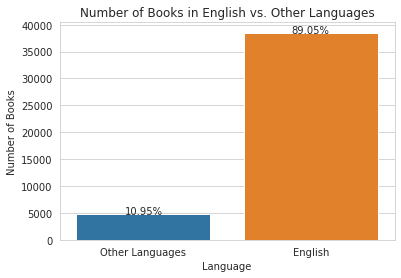

In [ ]:
# shows the number of books in english and the number of books in other langauges

# Create a new column that indicates if the book is in English or in another language
goodreads_clean["English"] = goodreads_clean["language"].str.contains("English").astype(int)

# Group the data based on the "English" column and count the number of books in each group
book_count = goodreads_clean.groupby("English").size().reset_index(name="count")
total_count = book_count["count"].sum()
book_count["percent"] = 100 * book_count["count"] / total_count

# Create barplot
ax = sns.barplot(x="English", y="count", data=book_count)
ax.set_xticklabels(["Other Languages", "English"])

# Give plot title and label axes
plt.title("Number of Books in English vs. Other Languages")
plt.xlabel("Language")
plt.ylabel("Number of Books")

#add the percentages of how many books are in English and how mang are in another language
for index, row in book_count.iterrows():
    ax.text(row["English"], row["count"], f"{row['percent']:.2f}%", ha="center")
plt.show()

*It was clear from this bar chart that a majority of the rated books on GoodReads were books in English. However, we wanted to see if perhaps there was a diversity when it came to top rated books, which is what we checked in the next barplot.*

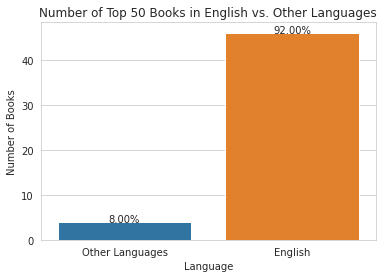

In [ ]:
# top 50 books by rating and grouped into English and none english
top_books = goodreads_clean.sort_values("rating", ascending=False).head(50)
top_books["English"] = top_books["language"].str.contains("English").astype(int)

# Group the data based on the "English" column and count the number of books in each group
book_count = top_books.groupby("English").size().reset_index(name="count")

# Create barplot
sns.set_style("whitegrid")
total_count = book_count["count"].sum()
book_count["percent"] = 100 * book_count["count"] / total_count
ax = sns.barplot(x="English", y="count", data=book_count)
ax.set_xticklabels(["Other Languages", "English"])

# Give plot title and label axes
plt.title("Number of Top 50 Books in English vs. Other Languages")
plt.xlabel("Language")
plt.ylabel("Number of Books")

#add the percentages of how many books are in English and how mang are in another language
for index, row in book_count.iterrows():
    ax.text(row["English"], row["count"], f"{row['percent']:.2f}%", ha="center")
plt.show()

*Finding: With the analysis of the barplots, we found that, in fact, there was an even larger discrepancy between rated books that were in English and books in other languages. This tells us is that GoodReads is mainly rating books that are written in or translated into English and therefore, when taking recommendations from the platform, the reader should be aware that this is not a comprehensive list of best books, rather a list of top rated books written in English.*

# Short Summary

Through our analysis, we have found that GoodReads is a useful recommendation platform for those who are looking for books based on consumer opinions rather than industry opnions (i.e. notable awards). This is also a good platform for those who are looking for best books in English rather than best books globally.